In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from numpy import errstate,isneginf,array
from sklearn.model_selection import GridSearchCV
from itertools import combinations 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
rnd_state = 1

In [53]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data.head()

Id  Age  Attrition BusinessTravel              Department  DistanceFromHome  Education EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  JobInvolvement                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  CommunicationSkill  Behaviour
0   1   30          0     Non-Travel  Research & Development                 2          3        Medical             571                        3  Female               3   Laboratory Technician                4        Single           2564                   0       No                 14                  3                 0                 12                      2              11                   7                        6                     7                   4          1
1   2   36          0  Travel_Rarely  Research & Development                12          4  Life Sciences            1614                        3  Female               3  Manufacturing Director                3       Married           4663                   9      Yes                 12                  3                 2                  7                      2               3                   2                        1                     1                   2          1
2   3   55          1  Travel_Rarely                   Sales                 2          1        Medical             842                        3    Male               3         Sales Executive                4        Single           5160                   4       No                 16                  3                 0                 12                      3               9                   7                        7                     3                   5          1
3   4   39          0  Travel_Rarely  Research & Development                24          1  Life Sciences            2014                        1    Male               3      Research Scientist                4        Single           4108                   7       No                 13                  3                 0                 18                      2               7                   7                        1                     7                   4          1
4   5   37          0  Travel_Rarely  Research & Development                 3          3          Other             689                        3    Male               3  Manufacturing Director                3       Married           9434                   1       No                 15                  3                 1                 10                      2              10                   7                        7                     8                   1          1

In [54]:
desc = pd.read_table("data_description.txt",sep="-", names=('Variable', 'Description')).iloc[1:,:2]
desc

Variable                                        Description
1                        Id                an anonymous id given to an Employee
2                       Age                                  Age of an Employee
3                 Attrition               Did the Employee leave the company, 0
4            BusinessTravel                  Travlling frequency of an Employee
5                Department                                     Work Department
6          DistanceFromHome                        Distance of office from home
7            EducationField                                  Field of Education
8            EmployeeNumber    Number of Employees in the division of a give...
9   EnvironmentSatisfaction                       Work Environment Satisfaction
10                   Gender                                  Gender of Employee
11            MartialStatus                       Martial Status of an employee
12            MonthlyIncome                   Monthly Income of Employee in USD
13       NumCompaniesWorked    Number of Companies in which Employee has wor...
14                 OverTime                       Does The person work overtime
15        PercentSalaryHike           Average annual salary hike in percentages
16         StockOptionLevel                 Company stocks given to an Employee
17        TotalWorkingYears             Total working experience of an employee
18    TrainingTimesLastYear    No. of trainings an employee went through las...
19           YearsAtCompany              Number of years worked at this company
20       YearsInCurrentRole                     Number of years in current role
21  YearsSinceLastPromotion                Number of years since last promotion
22     YearsWithCurrManager             Number of years with the current manage

In [55]:
# data.dtypes

In [56]:
data.describe()

Id          Age    Attrition  DistanceFromHome    Education  EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  CommunicationSkill  Behaviour
count  1628.000000  1628.000000  1628.000000       1628.000000  1628.000000     1628.000000              1628.000000     1628.000000      1628.000000    1628.000000         1628.000000        1628.000000        1628.000000       1628.000000        1628.000000            1628.000000     1628.000000         1628.000000              1628.000000           1628.000000         1628.000000     1628.0
mean    814.500000    35.645577     0.482187          9.735258     2.884521     1000.985872                 2.646192        2.650491         2.639435    5785.524570            2.761671          15.207617           3.155405          0.692260           9.949017               2.752457        6.092752            3.614865                 2.049140              3.551597            3.135749        1.0
std     470.107435     9.481794     0.499836          8.306546     1.020470      585.417694                 1.125283        0.736330         1.096272    4339.293147            2.549995           3.686703           0.362402          0.864808           7.482936               1.288033        5.921168            3.481051                 3.138287              3.494369            1.408770        0.0
min       1.000000    18.000000     0.000000          1.000000     1.000000        1.000000                 1.000000        1.000000         1.000000    1009.000000            0.000000          11.000000           3.000000          0.000000           0.000000               0.000000        0.000000            0.000000                 0.000000              0.000000            1.000000        1.0
25%     407.750000    29.000000     0.000000          2.000000     2.000000      509.250000                 2.000000        2.000000         2.000000    2625.000000            1.000000          12.000000           3.000000          0.000000           5.000000               2.000000        2.000000            1.000000                 0.000000              0.000000            2.000000        1.0
50%     814.500000    34.000000     0.000000          8.000000     3.000000      977.000000                 3.000000        3.000000         3.000000    4304.000000            2.000000          14.000000           3.000000          0.000000           8.000000               3.000000        5.000000            2.000000                 1.000000              2.000000            3.000000        1.0
75%    1221.250000    42.000000     1.000000         15.000000     4.000000     1494.000000                 4.000000        3.000000         4.000000    7124.250000            4.000000          18.000000           3.000000          1.000000          13.000000               3.000000        8.000000            7.000000                 2.000000              7.000000            4.000000        1.0
max    1628.000000    60.000000     1.000000         29.000000     5.000000     2068.000000                 4.000000        4.000000         4.000000   19999.000000            9.000000          25.000000           4.000000          3.000000          38.000000               6.000000       37.000000           18.000000                15.000000             17.000000            5.000000        1.0

In [57]:
# EDA

In [58]:
# data = data.drop("Id", axis=1)
X = data.drop(["Id", "Attrition"], axis=1)

Y = data.Attrition
X_num = X.select_dtypes(include = [ "int64"])
test = test.drop("Id", axis=1)
X_num.head()

Age  DistanceFromHome  Education  EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  CommunicationSkill  Behaviour
0   30                 2          3             571                        3               3                4           2564                   0                 14                  3                 0                 12                      2              11                   7                        6                     7                   4          1
1   36                12          4            1614                        3               3                3           4663                   9                 12                  3                 2                  7                      2               3                   2                        1                     1                   2          1
2   55                 2          1             842                        3               3                4           5160                   4                 16                  3                 0                 12                      3               9                   7                        7                     3                   5          1
3   39                24          1            2014                        1               3                4           4108                   7                 13                  3                 0                 18                      2               7                   7                        1                     7                   4          1
4   37                 3          3             689                        3               3                3           9434                   1                 15                  3                 1                 10                      2              10                   7                        7                     8                   1          1

<AxesSubplot:xlabel='Attrition', ylabel='count'>

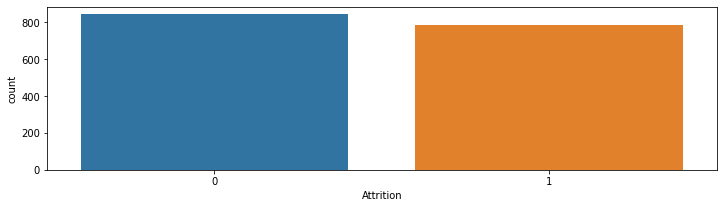

In [59]:
sns.countplot(Y)

In [60]:
X_num = X.select_dtypes(include=['int64'])
X_cat = X.select_dtypes(include=['object'])
X_cat.head()

BusinessTravel              Department EducationField  Gender                 JobRole MaritalStatus OverTime
0     Non-Travel  Research & Development        Medical  Female   Laboratory Technician        Single       No
1  Travel_Rarely  Research & Development  Life Sciences  Female  Manufacturing Director       Married      Yes
2  Travel_Rarely                   Sales        Medical    Male         Sales Executive        Single       No
3  Travel_Rarely  Research & Development  Life Sciences    Male      Research Scientist        Single       No
4  Travel_Rarely  Research & Development          Other    Male  Manufacturing Director       Married       No

In [61]:
discrete_cols = []
cont_cols = []
for col in X_num.columns:
    if X_num[col].unique().shape[0] < 5:
        discrete_cols.append(col)
    else:
        cont_cols.append(col)

X_discrete = X_num.loc[:, discrete_cols]
X_cont = X_num.loc[:, cont_cols]

In [62]:
# EDA

4 2
Figure(1008x1440) [[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


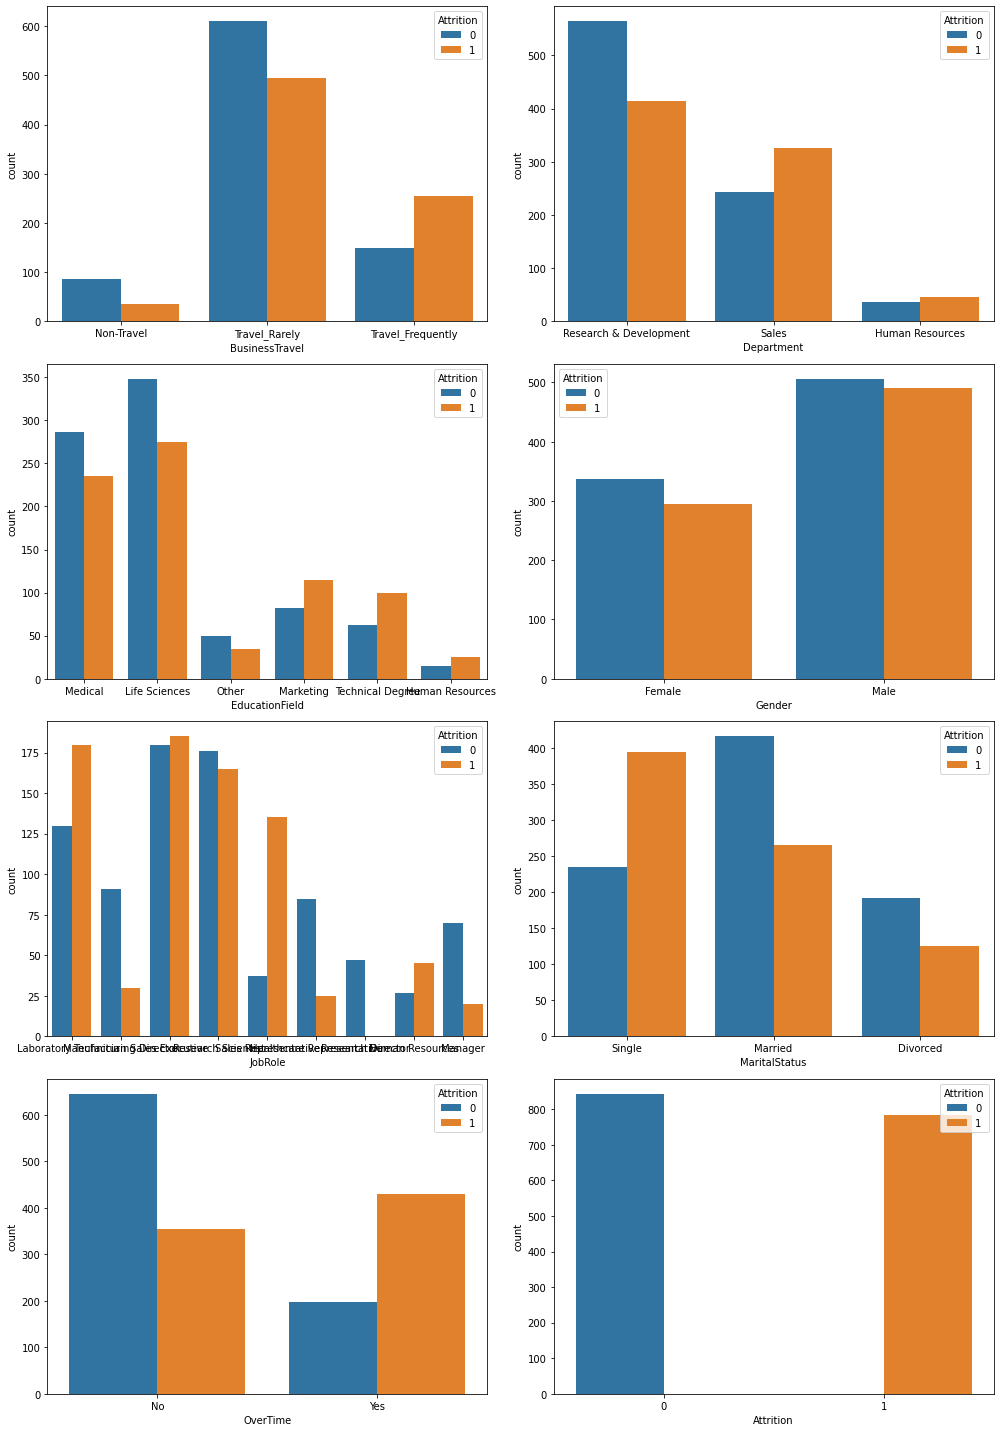

In [63]:
enc_data = pd.concat([X_cat, Y], axis=1)
col_val = 2
row_w, col_w = 5, 7
n_rows, n_cols = int(len(enc_data.columns)/col_val), col_val
print(n_rows, n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*col_w, n_rows*row_w ))
print(fig, axes)

for i, ix in enumerate(fig.axes):
    sns.countplot(x=enc_data.columns[i], hue="Attrition", data=enc_data, ax=ix)
fig.tight_layout()

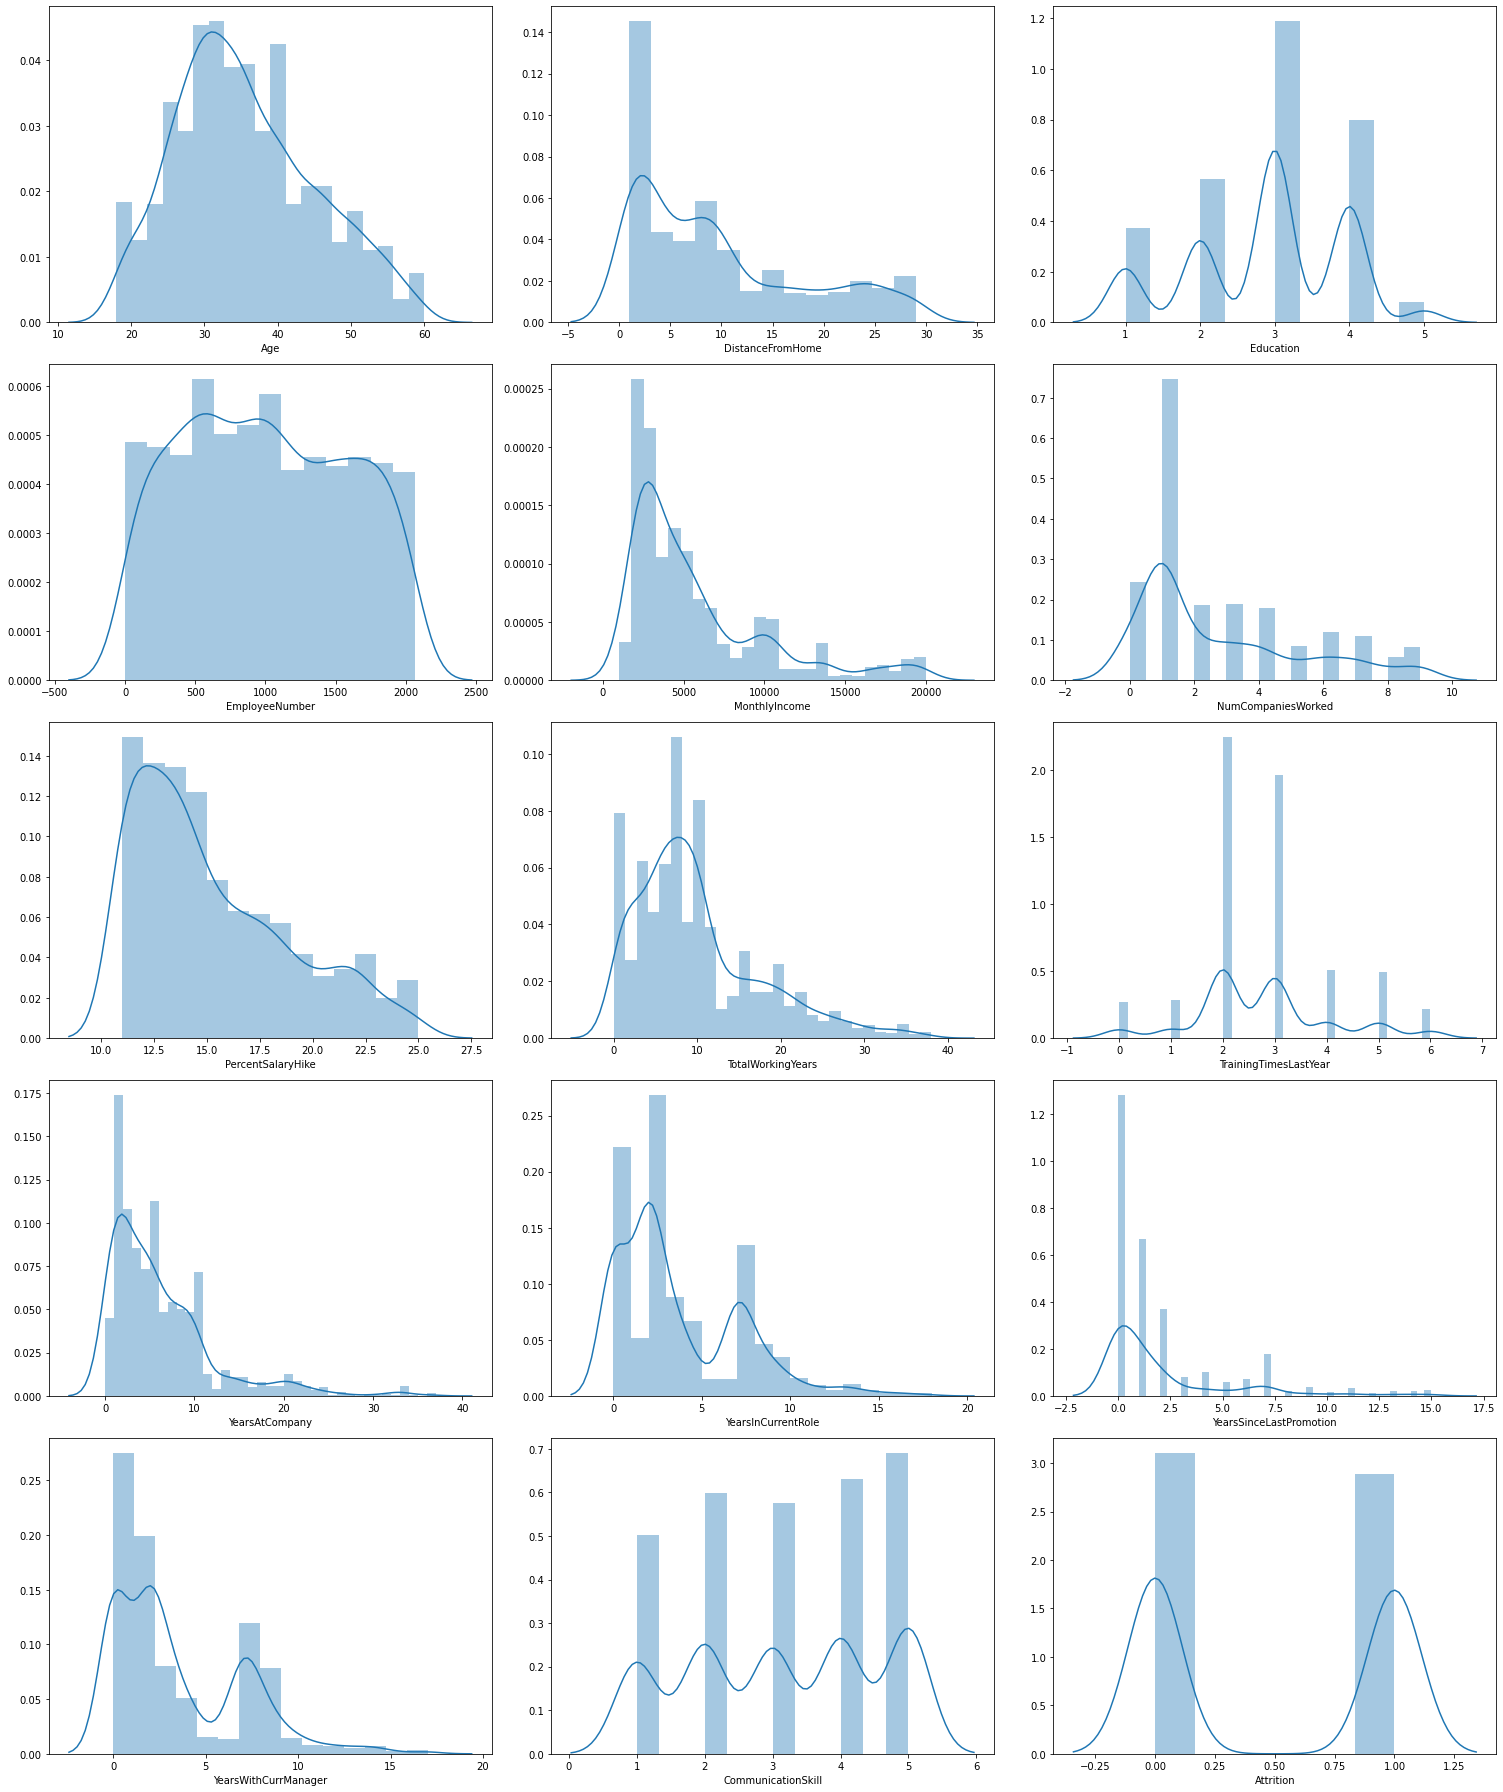

In [64]:
cont_data = pd.concat([X_cont, Y], axis=1)
cont_data.dtypes
col_val = 3
row_w, col_w = 5, 7
n_rows, n_cols = int(len(cont_data.columns)/col_val), col_val
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*col_w, n_rows*row_w ))

for i, ix in enumerate(fig.axes):
    sns.distplot(cont_data.iloc[:, i], ax=ix)
fig.tight_layout()

C:\Users\sunny\anaconda3\lib\site-packages\seaborn-0.10.1-py3.7.egg\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


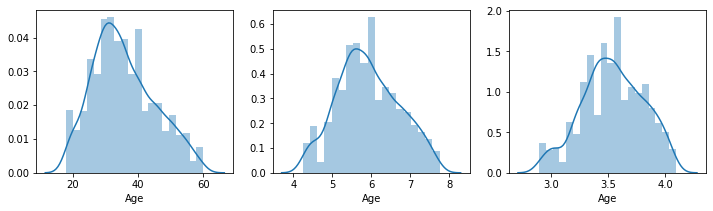

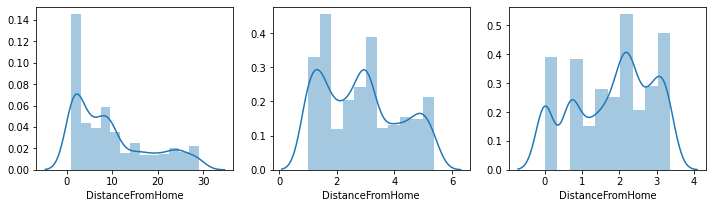

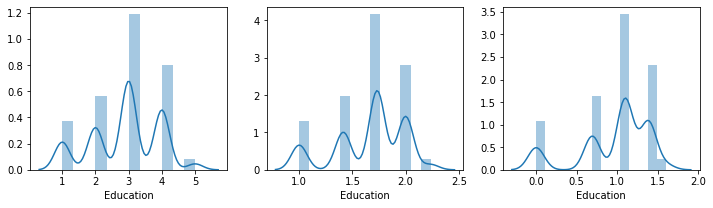

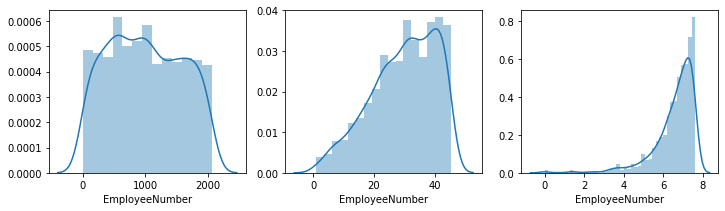

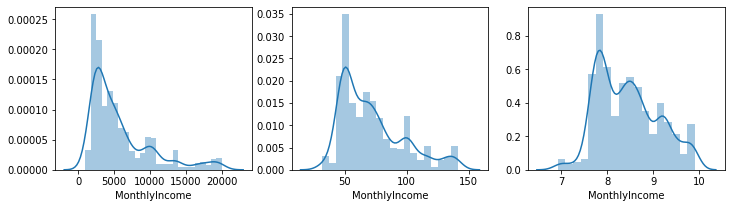

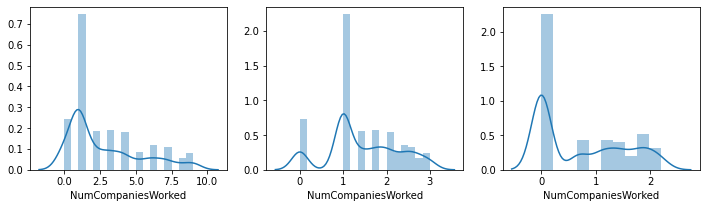

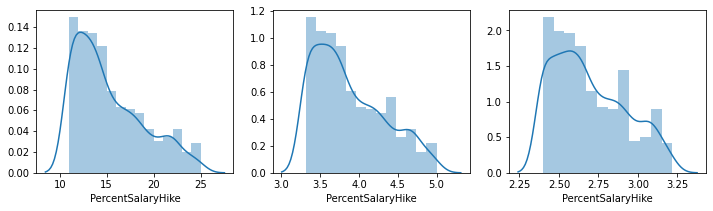

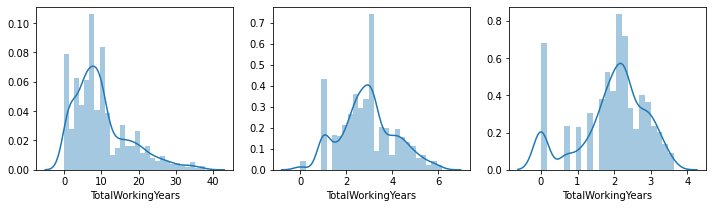

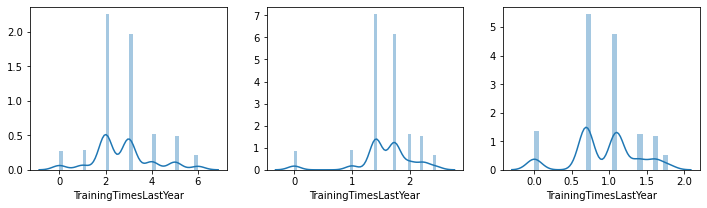

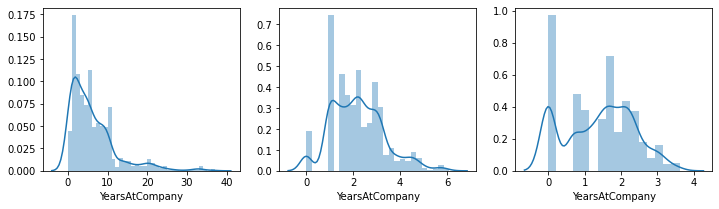

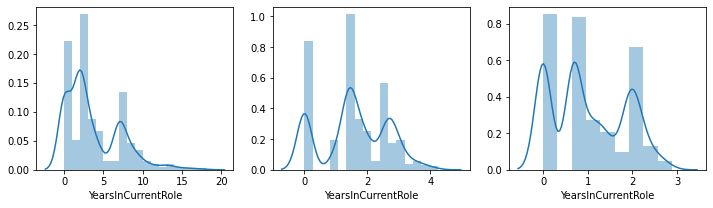

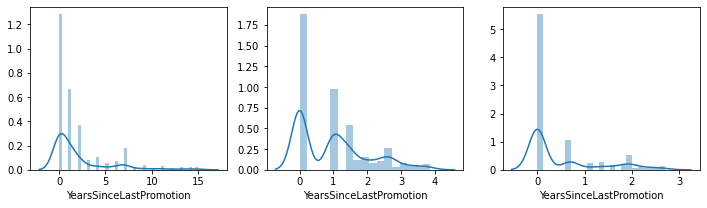

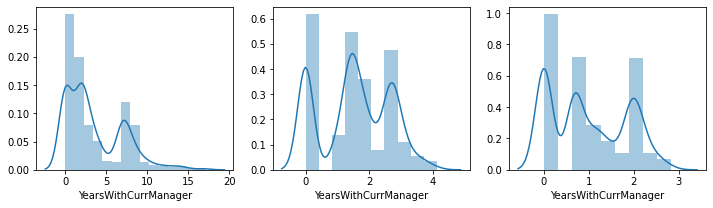

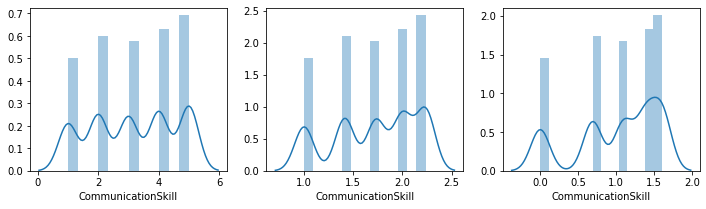

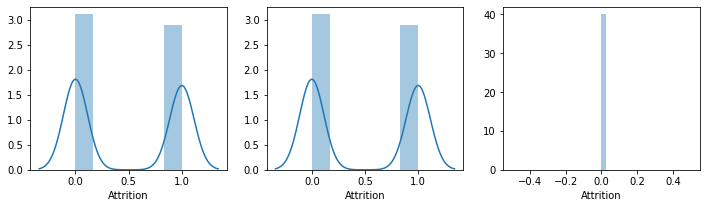

In [65]:
for col in cont_data.columns:
    plt.rcParams['figure.figsize']=(12,3)
    f, (ax1, ax2, ax3) = plt.subplots(1,3)

    sns.distplot(cont_data[col], ax=ax1)
    sns.distplot(np.sqrt(cont_data[col]), ax=ax2)
    with errstate(divide='ignore'):
        res = np.log(cont_data[col])
    res[isneginf(res)] = 0
    sns.distplot(res, ax=ax3)
    

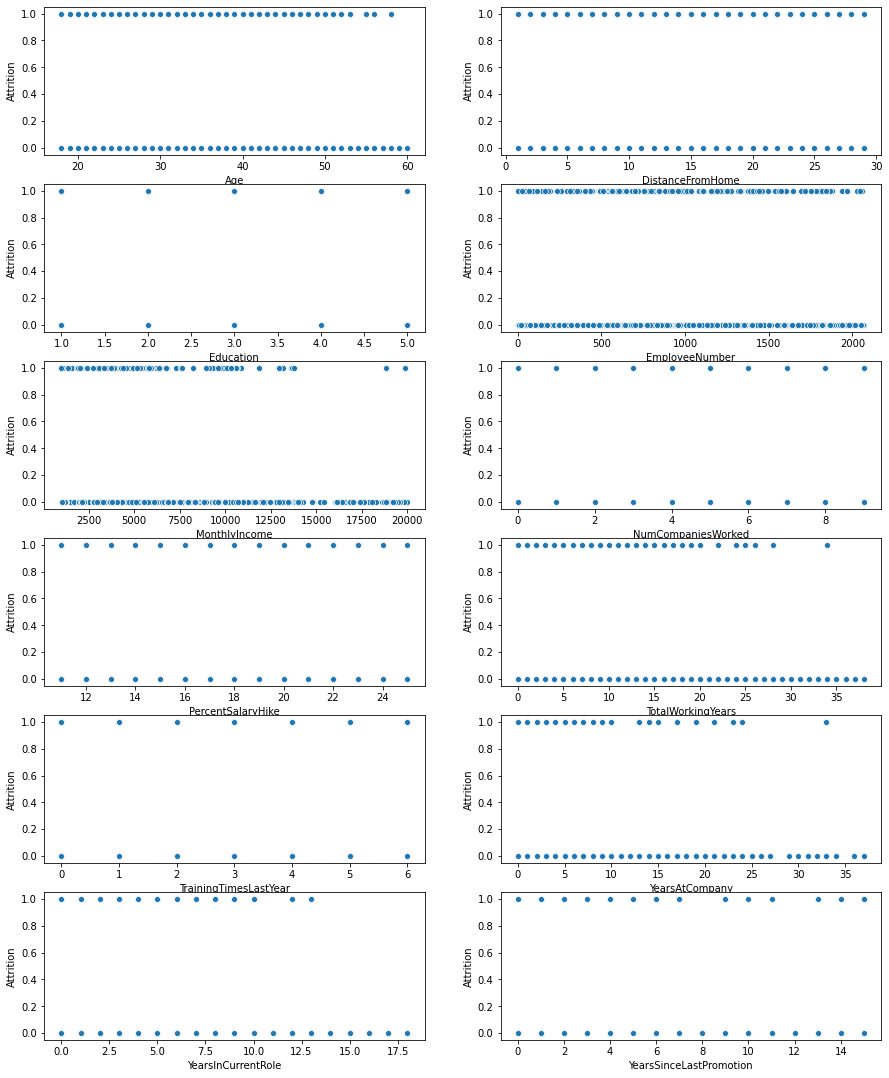

In [66]:
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(15, 19))
for i, ix in enumerate(fig.axes):
    sns.scatterplot(x=cont_data.iloc[:, i], y=cont_data.Attrition, ax=ix)

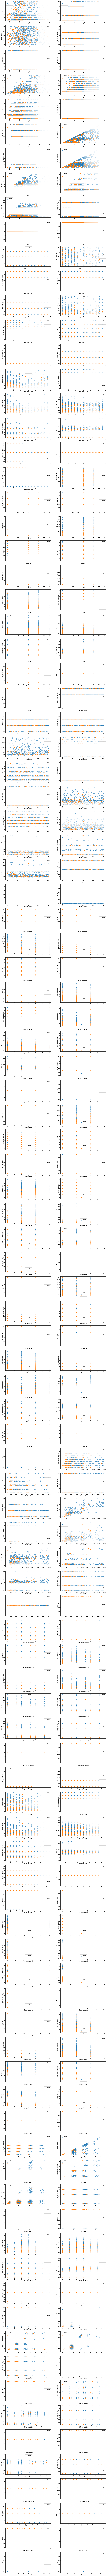

In [73]:
X_num2 = pd.concat([X_num, Y], axis=1)
# print(X_num2.head())
num_cols = X_num2.columns
col_len = len(num_cols)
col_val = 2
row_w = 5
col_w = 10
list2 = list(combinations(range(col_len), 2))
n_rows, n_cols = int(len(list2)/col_val), col_val
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*5 ))
list1 = fig.axes
for ix, col in zip(list1, list2):
    sns.scatterplot(data=X_num2, x=X_num2.columns[col[0]], y=X_num2.columns[col[1]], hue='Attrition', alpha=0.7, ax=ix)
# fig.tight_layout()

<AxesSubplot:>

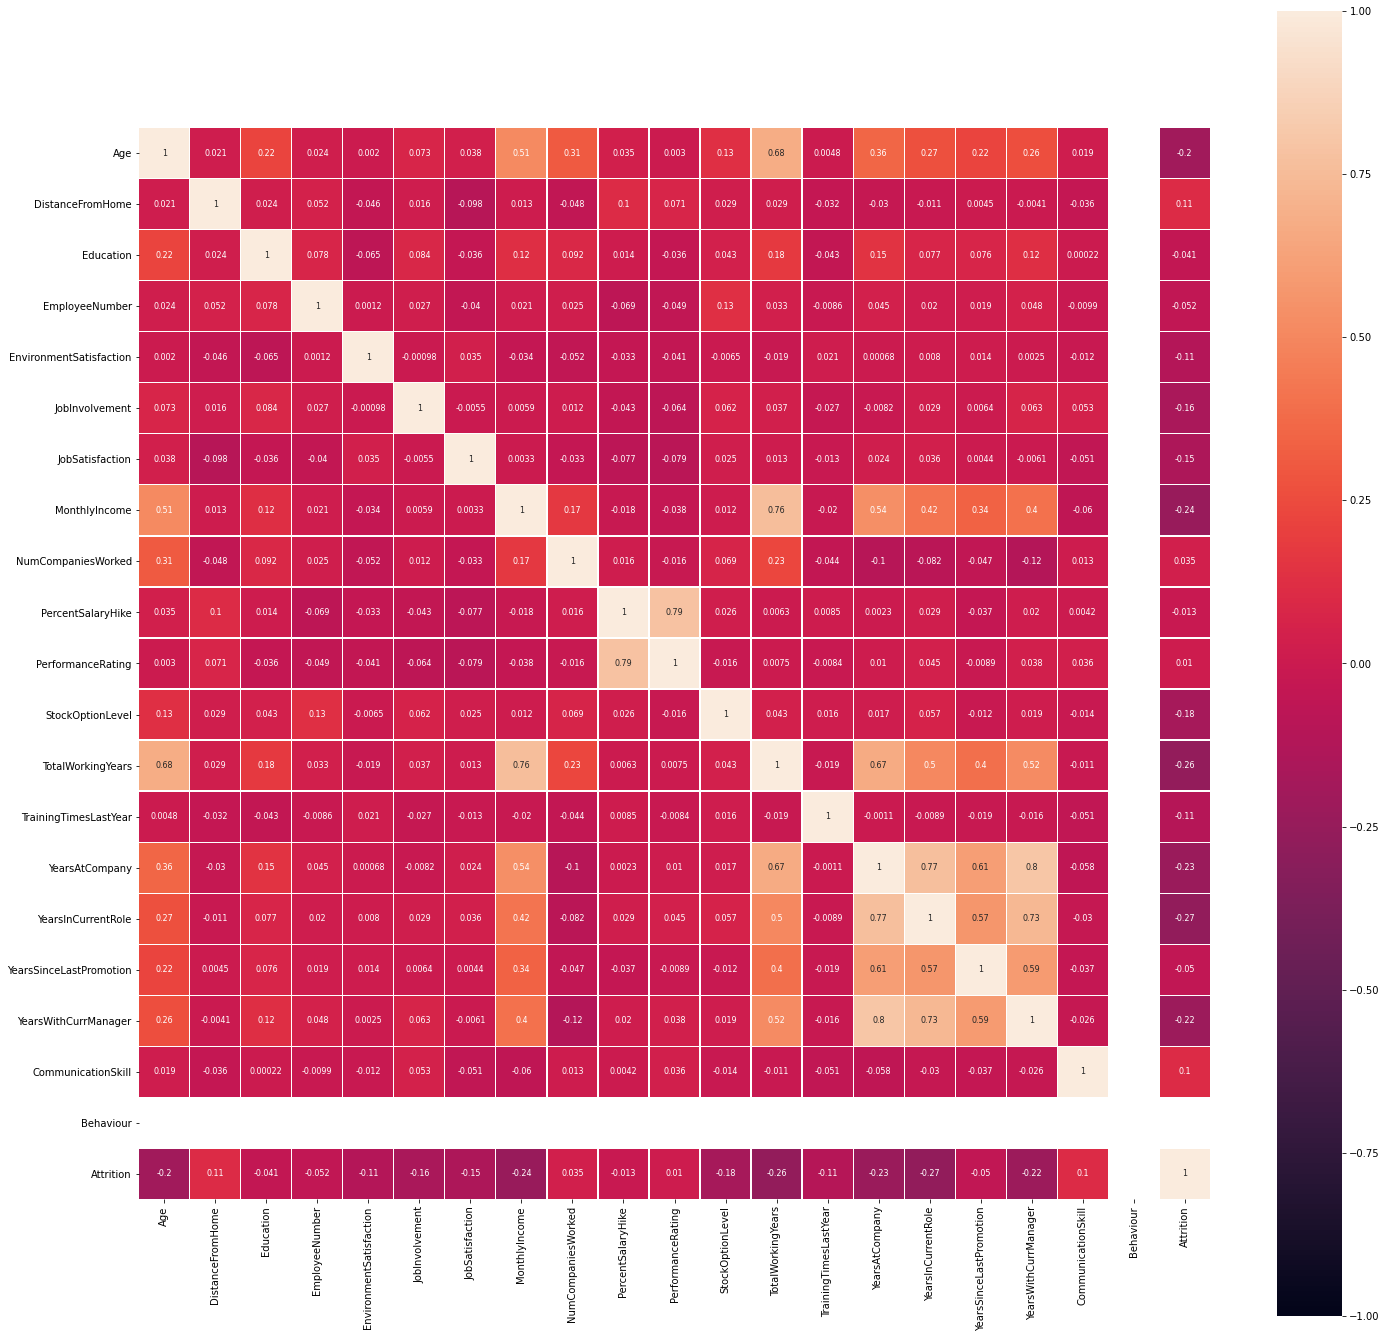

In [29]:
X_num = pd.concat((X_num, Y), axis=1)
correlation = X_num.corr()

fig, ax = plt.subplots(figsize=(24,24)) 
sns.heatmap(correlation, vmin=-1,vmax=1, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [30]:
dis_cols = [col for col in X_num.columns if X_num[col].unique().shape[0] < 6]
dis_data = pd.concat((X_num.loc[:, dis_cols], Y), axis=1)
dis_data.head()

Education  EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  PerformanceRating  StockOptionLevel  CommunicationSkill  Behaviour  Attrition  Attrition
0          3                        3               3                4                  3                 0                   4          1          0          0
1          4                        3               3                3                  3                 2                   2          1          0          0
2          1                        3               3                4                  3                 0                   5          1          1          1
3          1                        1               3                4                  3                 0                   4          1          0          0
4          3                        3               3                3                  3                 1                   1          1          0          0

In [31]:
def baseline_model(X_train_, y_train_, X_valid_, y_valid_, test_, sub):
    
    parameters = {"penalty" : ['l1', 'l2'], "solver" : ["liblinear", "saga"] , "C": list(np.arange(0.2, 3, 0.4, dtype = np.float16)),"max_iter": list(range(500,800,100)), 'l1_ratio':[0.25,0.5,0.75]}
    lg = LogisticRegression( random_state=rnd_state)

    grid = GridSearchCV(
    estimator=lg,
    param_grid=parameters,
    scoring='accuracy', verbose=1, n_jobs=-1)

    grid_result = grid.fit(X_train_, y_train_)
    best_params = grid_result.best_params_
    pred = grid_result.predict_proba(X_valid_)[:,1]
    print('Best Params :',best_params)
    print('ROC score : ' + str(roc_auc_score(y_valid_,pred)))
    preds_test = grid.predict_proba(test_)
    if sub:
        probs = preds_test[:,1]
        ids = np.arange(1, len(test_)+1)
        output = pd.DataFrame({'Id': ids,
                               'Attrition': probs})
        output.to_csv('submission_%s_%s.csv'%("2", "3"), index=False)

In [32]:
def apply_log(data):
    with errstate(divide='ignore'):
        res = np.log(data)
    res[isneginf(res)] = 0
    res[np.isinf(res)] = 0
    res[np.isnan(res)] = 0
    return res

In [33]:
X_train, X_valid,y_train, y_valid = train_test_split(X,Y, random_state=1)
print("Train Data:", (X_train.shape))
print("Validation Data:" , (X_valid.shape))
print("Test Data:",test.shape)

X_train_, X_valid_,y_train_, y_valid_ = X_train.copy(), X_valid.copy(), y_train.copy(), y_valid.copy() 
test_ = test.copy()

Train Data: (1221, 27)
Validation Data: (407, 27)
Test Data: (470, 27)


In [34]:
# Check for missing values - No missing values

In [35]:
# print(X_train_.isnull().sum() > 0)
# print(X_valid_.isnull().sum() > 0)
# print(test_.isnull().sum() > 0)
# No missing values

In [36]:
X_train_ = X_train_.drop("Behaviour", axis=1)
X_valid_ = X_valid_.drop("Behaviour", axis=1)
test_ = test_.drop("Behaviour", axis=1)

In [37]:
# Drop duplicates

In [38]:
train_duplicates = X_train_.duplicated()
val_duplicates = X_valid_.duplicated()

print("No of duplicate rows in train data %s in %s" %(train_duplicates.sum(), len(X_train_)))
print("No of duplicate rows in validation data %s in %s" %(val_duplicates.sum(), len(X_valid_)))

No of duplicate rows in train data 424 in 1221
No of duplicate rows in validation data 82 in 407


In [39]:
# Drop duplicates
X_train_ = pd.concat((X_train_, y_train_), axis=1)
X_valid_ = pd.concat((X_valid_, y_valid_), axis=1)

X_train_.drop_duplicates(inplace=True)
X_valid_.drop_duplicates(inplace=True)
test_.drop_duplicates(inplace=True)

y_train_ = X_train_.Attrition
X_train_ = X_train_.drop("Attrition", axis=1)

y_valid_ = X_valid_.Attrition
X_valid_ = X_valid_.drop("Attrition", axis=1)

In [40]:
# # Encoding relevant variables

# Ordinal encoding
cat1 = pd.Categorical(X_train_.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True,na_sentinel = -1)
X_train_.loc[:, 'BusinessTravel'] = labels1

cat1 = pd.Categorical(X_valid_.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True,na_sentinel = -1)
X_valid_.loc[:, 'BusinessTravel'] = labels1

cat1 = pd.Categorical(test_.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True,na_sentinel = -1)
test_.loc[:, 'BusinessTravel'] = labels1

cat1 = pd.Categorical(X_train_.OverTime, categories=['No', 'Yes'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True,na_sentinel = -1)
X_train_.loc[:, 'OverTime'] = labels1

cat1 = pd.Categorical(X_valid_.OverTime, categories=['No', 'Yes'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True,na_sentinel = -1)
X_valid_.loc[:, 'OverTime'] = labels1

cat1 = pd.Categorical(test_.OverTime, categories=['No', 'Yes'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True,na_sentinel = -1)
test_.loc[:, 'OverTime'] = labels1

# one hot encoding
hotenc_cols = set(X_cat.columns) - set(["BusinessTravel", "OverTime"])

label_cols = hotenc_cols
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_[label_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid_[label_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test_[label_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train_.index
OH_cols_valid.index = X_valid_.index
OH_cols_test.index = test_.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train_.drop(label_cols, axis=1)
num_X_valid = X_valid_.drop(label_cols, axis=1)
num_X_test = test_.drop(label_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

X_train_ = OH_X_train
X_valid_ = OH_X_valid 
test_ = OH_X_test 

In [41]:
# Over sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_train_, y_train_ = sm.fit_sample( X_train_, y_train_)
X_valid_, y_valid_ = sm.fit_sample( X_valid_, y_valid_)

In [42]:
# Biinarize some cols
X_train_['stock_bin'] = (X_train_.StockOptionLevel==0).astype(int)
X_train_['jobsatisfaction_bin'] = (X_train_.JobSatisfaction==4).astype(int)
X_train_['well_communicate_bin'] = (X_train_.CommunicationSkill==5).astype(int)
X_train_['monthly_income_bin'] = (X_train_.MonthlyIncome<6000).astype(int)

X_valid_['stock_bin'] = (X_valid_.StockOptionLevel==0).astype(int)
X_valid_['jobsatisfaction_bin'] = (X_valid_.JobSatisfaction==4).astype(int)
X_valid_['well_communicate_bin'] = (X_valid_.CommunicationSkill==5).astype(int)
X_valid_['monthly_income_bin'] = (X_valid_.MonthlyIncome<6000).astype(int)

test_['stock_bin'] = (test_.StockOptionLevel==0).astype(int)
test_['jobsatisfaction_bin'] = (test_.JobSatisfaction==4).astype(int)
test_['well_communicate_bin'] = (test_.CommunicationSkill==5).astype(int)
test_['monthly_income_bin'] = (test_.MonthlyIncome<6000).astype(int)

In [43]:
log_cols = ["DistanceFromHome" ,"MonthlyIncome" ,"NumCompaniesWorked",	"PercentSalaryHike", "TotalWorkingYears","YearsInCurrentRole"]   
sqrt_cols = ["Age"]

X_train_[sqrt_cols] = np.sqrt(3+X_train_[sqrt_cols])
with errstate(divide='ignore'):
    res = apply_log(2 + X_train_[log_cols])
X_train_[log_cols] = res

X_valid_[sqrt_cols] = np.sqrt(3+X_valid_[sqrt_cols])
with errstate(divide='ignore'):
    res = apply_log(2 + X_valid_[log_cols])
X_valid_[log_cols] = res

test_[sqrt_cols] = np.sqrt(3+test_[sqrt_cols])
with errstate(divide='ignore'):
    res = apply_log(2 + test_[log_cols])
test_[log_cols] = res

In [44]:
# Scaling data
scaler = StandardScaler()
X_train_copy = scaler.fit_transform(X_train_)
y_train_copy = y_train_.copy()
X_valid_copy = scaler.fit_transform(X_valid_)
y_valid_copy = y_valid_.copy()
test_copy = scaler.fit_transform(test_)

In [45]:
baseline_model(X_train_copy, y_train_copy, X_valid_copy, y_valid_copy, test_copy, 0)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Best Params : {'C': 0.2, 'l1_ratio': 0.25, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
ROC score : 0.8876216360503774


C:\Users\sunny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


In [46]:
logistic = LogisticRegression(C=0.2, penalty="l2", solver='saga',max_iter = 500, l1_ratio = 0.25, random_state=7)
lr_best = logistic.fit(X_train_copy, y_train_copy)
feature_weights = np.array(lr_best.coef_).reshape(-1)

C:\Users\sunny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


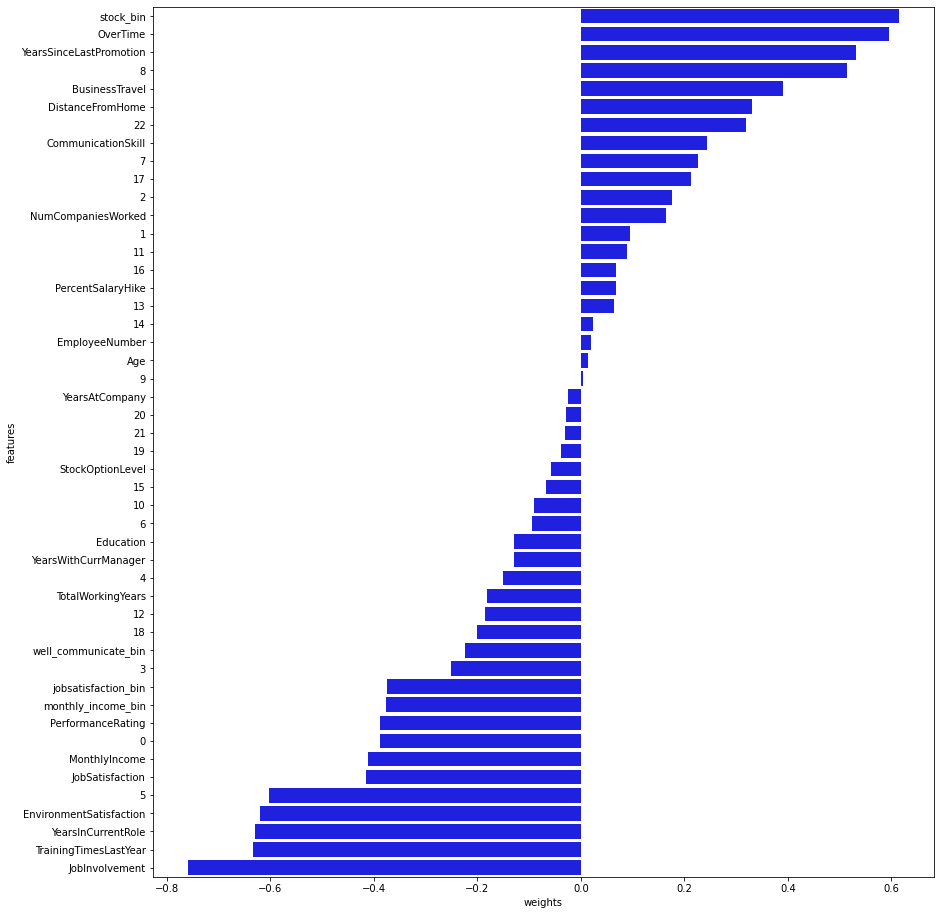

In [47]:
# Feature importance
feature_val = pd.DataFrame({'features':X_train_.columns, 'weights':feature_weights})
feature_val.sort_values(by='weights', ascending=False, inplace=True)
plt.figure(figsize=(14,16))
sns.barplot(y='features',x='weights',data=feature_val,color='blue')
plt.show()

In [48]:
# Drop less weightage columns
less_weight_columns= feature_val[abs(feature_val.weights)<0].features.to_list()

X_train_copy = pd.DataFrame(X_train_copy, columns = X_train_.columns)
X_valid_copy = pd.DataFrame(X_valid_copy, columns = X_valid_.columns)
test_copy = pd.DataFrame(test_copy, columns = test_.columns)

X_train_copy.drop(columns=less_weight_columns,inplace=True)
X_valid_copy.drop(columns=less_weight_columns,inplace=True)
test_copy.drop(columns=less_weight_columns,inplace=True)

In [49]:
lr_best.fit(X_train_copy,y_train_copy)
pred = lr_best.predict_proba(X_valid_copy)[:,1]
print('ROC score : ' + str(roc_auc_score(y_valid_,pred)))

ROC score : 0.8876216360503774


C:\Users\sunny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


In [50]:
# Final submission
preds_test = lr_best.predict_proba(test_copy)
probs = preds_test[:,1]
ids = np.arange(1, len(test_)+1)
output = pd.DataFrame({'Id': ids,
                       'Attrition': probs})
output.to_csv('submission_%s_%s.csv'%("final", "1"), index=False)